In [22]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Step 1: Load the dataset
df = pd.read_csv('excavator_dataset2.csv')

In [25]:
print(df.head())

   Joint_0_Angle  Joint_1_Angle  Joint_2_Angle  Joint_3_Angle  Joint_4_Angle  \
0      -0.009395      -0.007485      -0.035738      -0.053215       0.000846   
1      -0.074515       0.040141       0.005507       0.084674      -0.031074   
2       0.004320      -0.068904      -0.041630      -0.087335      -0.058079   
3      -0.017165       0.081962       0.052357      -0.052768       0.022803   
4       0.057315       0.009610      -0.006171       0.005783      -0.015795   

   Joint_0_Encoder  Joint_1_Encoder  Joint_2_Encoder  Joint_3_Encoder  \
0        -0.031101         0.035451        -0.015680        -0.080199   
1        -0.073233        -0.003016        -0.014481         0.084182   
2        -0.015430        -0.053332        -0.078555        -0.093670   
3        -0.011073         0.084398         0.044855        -0.033967   
4         0.043580         0.000771        -0.021874         0.017885   

   Joint_4_Encoder  
0         0.023200  
1        -0.018928  
2        -0.04604

In [26]:
# Print existing columns to inspect
print("Columns in dataset:", df.columns)

Columns in dataset: Index(['Joint_0_Angle', 'Joint_1_Angle', 'Joint_2_Angle', 'Joint_3_Angle',
       'Joint_4_Angle', 'Joint_0_Encoder', 'Joint_1_Encoder',
       'Joint_2_Encoder', 'Joint_3_Encoder', 'Joint_4_Encoder'],
      dtype='object')


In [27]:
# Check for required columns in the dataset
required_columns = ["Joint_0_Angle", "Joint_1_Angle"]  # Add more columns if required

if not all(column in df.columns for column in required_columns):
    raise ValueError("Dataset must include columns: " + ", ".join(required_columns))

In [28]:
# Step 2: Clustering states based on joint angles
state_vectors = df[required_columns].values  # Using only the required columns
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(state_vectors)

C:\Users\madda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
# Assign cluster labels to the DataFrame
df['Cluster'] = cluster_labels

In [31]:
# Define themes for each cluster
cluster_theme_mapping = {
    0: "Moving to Pick Position",
    1: "Picking Objects",
    2: "Moving to Place Position",
    3: "Placing Objects",
    4: "Idle or Transition"
}
df['Cluster_Theme'] = df['Cluster'].map(cluster_theme_mapping)


In [32]:
# Step 3: Visualize clusters using PCA
pca = PCA(n_components=2)
state_vectors_2d = pca.fit_transform(state_vectors)
df_pca = pd.DataFrame(state_vectors_2d, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = cluster_labels
df_pca['Cluster_Theme'] = df['Cluster_Theme']

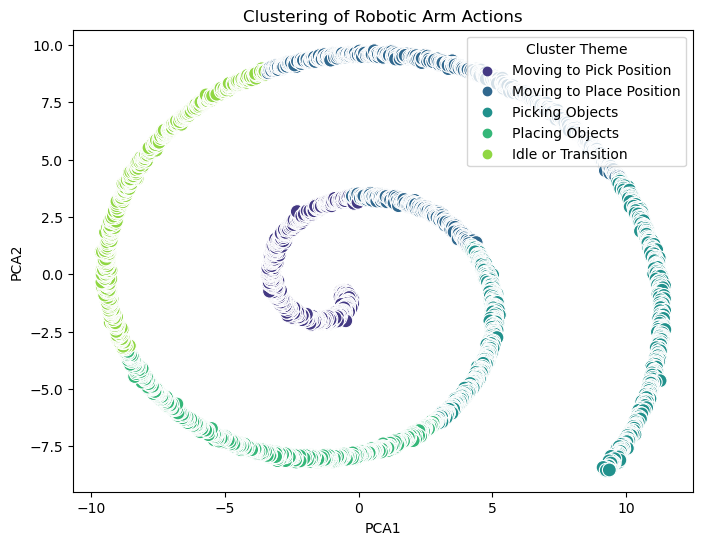

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Theme', data=df_pca, palette='viridis', s=100)
plt.title("Clustering of Robotic Arm Actions")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title='Cluster Theme')
plt.show()

In [42]:
# Step 4a: Display Cluster 0 Theme and Sample Data
cluster_num = 0
theme = "Moving to Pick Position"
print(f"\nCluster {cluster_num}: {theme}")
sample_data = df[df['Cluster'] == cluster_num].head(5)
print("\nSample Data:")
print(sample_data[required_columns])  # Display relevant joint angles for this cluster
print("\n")


Cluster 0: Moving to Pick Position

Sample Data:
   Joint_0_Angle  Joint_1_Angle
0      -0.009395      -0.007485
1      -0.074515       0.040141
2       0.004320      -0.068904
3      -0.017165       0.081962
4       0.057315       0.009610




In [43]:
# Step 4b: Display Cluster 1 Theme and Sample Data
cluster_num = 1
theme = "Picking Objects"
print(f"\nCluster {cluster_num}: {theme}")
sample_data = df[df['Cluster'] == cluster_num].head(5)
print("\nSample Data:")
print(sample_data[required_columns])  # Display relevant joint angles for this cluster
print("\n")


Cluster 1: Picking Objects

Sample Data:
      Joint_0_Angle  Joint_1_Angle
4149      -4.556027       2.543595
4151      -4.535939       2.541153
4153      -4.496646       2.555437
4154      -4.631125       2.620117
4155      -4.579686       2.548854




In [44]:
# Step 4c: Display Cluster 2 Theme and Sample Data
cluster_num = 2
theme = "Moving to Place Position"
print(f"\nCluster {cluster_num}: {theme}")
sample_data = df[df['Cluster'] == cluster_num].head(5)
print("\nSample Data:")
print(sample_data[required_columns])  # Display relevant joint angles for this cluster
print("\n")


Cluster 2: Moving to Place Position

Sample Data:
      Joint_0_Angle  Joint_1_Angle
3298      -3.539673      -2.275212
3305      -3.540235      -2.206337
3307      -3.586089      -2.251661
3310      -3.601702      -2.252285
3312      -3.589983      -2.317328




In [45]:
# Step 4d: Display Cluster 3 Theme and Sample Data
cluster_num = 3
theme = "Placing Objects"
print(f"\nCluster {cluster_num}: {theme}")
sample_data = df[df['Cluster'] == cluster_num].head(5)
print("\nSample Data:")
print(sample_data[required_columns])  # Display relevant joint angles for this cluster
print("\n")


Cluster 3: Placing Objects

Sample Data:
      Joint_0_Angle  Joint_1_Angle
5278       2.374318       6.185177
5286       2.328210       6.147557
5287       2.372334       6.168102
5288       2.453117       6.224250
5289       2.366868       6.242166


